# Testing Section

In [1]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

   ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

## Apriori Preparation

In [2]:
import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)    #Apply one-hot-encoding on our dataset
df=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


 ## Support

In [3]:
from mlxtend.frequent_patterns import apriori
apriori(df, min_support=0.6)

,support,itemsets
0,0.6,(2)
1,0.8,(5)
2,0.8,(7)
3,0.6,(9)
4,0.6,"(5, 7)"
5,0.6,"(9, 5)"


### Support with column names

In [4]:
frequent_itemsets=apriori(df, min_support=0.6, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Scarf, Pants)"
5,0.6,"(Pants, Skirt)"


## Confidence

In [5]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7) # associate itemsets with confidence over 70%.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6
3,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf


## Lift

In [6]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="lift",min_threshold=1.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.0,1.25,0.12,inf


In [7]:

import pandas as pd

#Reading File
data_frame = pd.read_csv(r'Market_Basket_Optimisation.csv', header=None)

#Display data
data_frame.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Data Length
data_frame.shape

(7501, 20)

In [9]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [10]:
#Describe Dataset
data_frame.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,protein bar,frozen smoothie,protein bar,mayonnaise,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


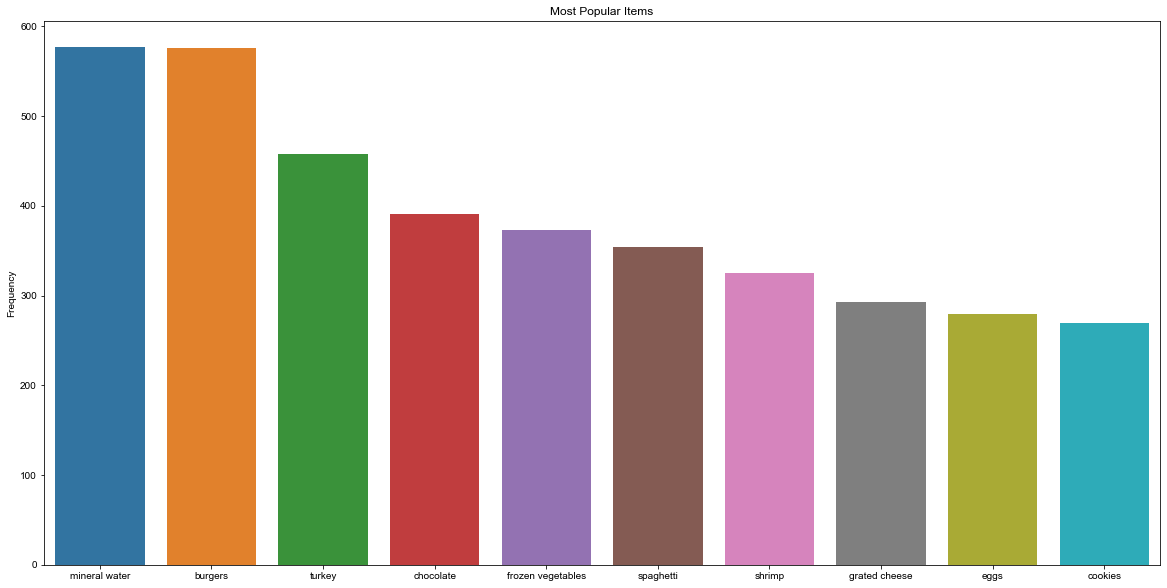

In [11]:
#Plotting Most frequency Items - Column 0
import matplotlib.pyplot as plt
import seaborn as sns 
fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(ax= ax, x = data_frame[0].value_counts().head(10).index, y=data_frame[0].value_counts().head(10))
plt.ylabel('Frequency')
plt.title('Most Popular Items')
sns.set(font_scale=1.3)
plt.show()

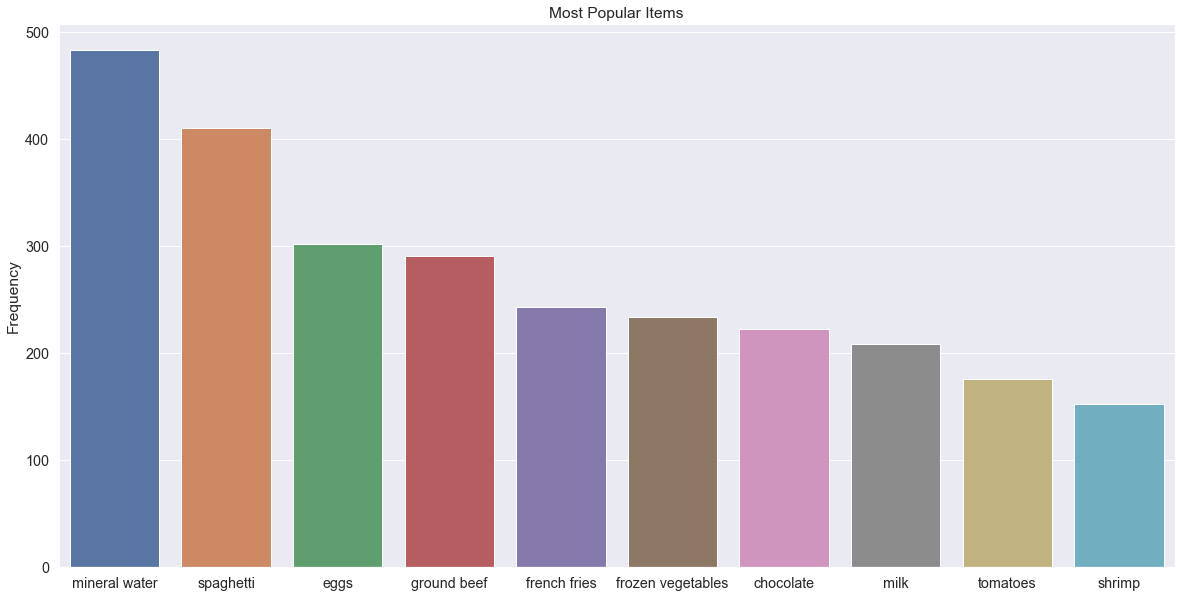

In [12]:
#Plotting Most frequency Items - Column 1
import matplotlib.pyplot as plt
import seaborn as sns 
fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(ax= ax, x = data_frame[1].value_counts().head(10).index, y=data_frame[1].value_counts().head(10))
plt.ylabel('Frequency')
plt.title('Most Popular Items')
sns.set(font_scale=1.3)
plt.show()

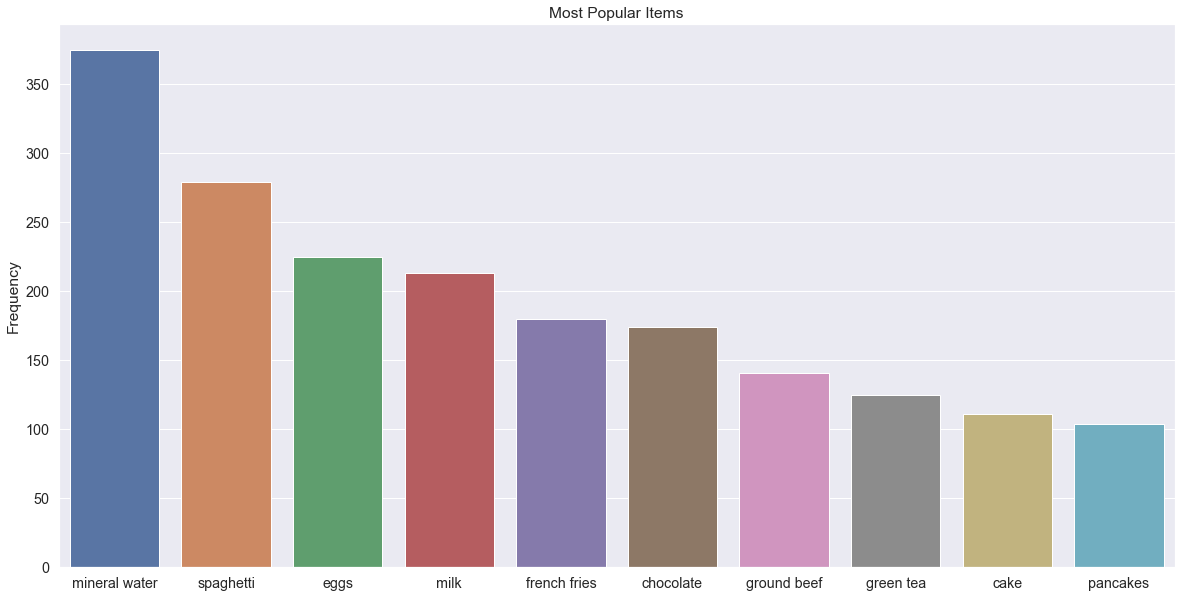

In [13]:
#Plotting Most frequency Items - Column 2
import matplotlib.pyplot as plt
import seaborn as sns 
fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(ax= ax, x = data_frame[2].value_counts().head(10).index, y=data_frame[2].value_counts().head(10))
plt.ylabel('Frequency')
plt.title('Most Popular Items')
sns.set(font_scale=1.3)
plt.show()

#  - Unsupervised Machine Learning - Association Rules:

##  Apriori Preparation

In [14]:
#preprocessing 
import numpy as np 
purchaser = []
for i in range(0, 7501):
    purchaser.append([str(data_frame.values[i,j]) for j in range(0, 20)])

purchaser = np.array(purchaser) # create numpy array
purchaser.shape # checking shape

(7501, 20)

In [15]:
import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit( purchaser).transform( purchaser)    #Apply one-hot-encoding on our dataset
df=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
df


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:

#Most 50 Chosen Items
data_frame[0].value_counts().head(50)

mineral water        577
burgers              576
turkey               458
chocolate            391
frozen vegetables    373
spaghetti            354
shrimp               325
grated cheese        293
eggs                 279
cookies              270
french fries         244
herb & pepper        232
ground beef          218
tomatoes             212
milk                 181
escalope             143
fresh tuna           129
red wine             123
ham                  120
cake                  98
green tea             97
whole wheat pasta     95
pancakes              80
soup                  78
muffins               69
olive oil             67
energy bar            67
champagne             64
pepper                61
avocado               57
butter                52
parmesan cheese       51
whole wheat rice      47
low fat yogurt        46
chicken               44
vegetables mix        39
pickles               38
meatballs             33
frozen smoothie       32
yogurt cake           31


In [17]:
new_data = data_frame[0].value_counts().head(50).index.tolist()
df = df.loc[:,new_data]
df.shape

(7501, 50)

### support with itemsets

In [18]:
from mlxtend.frequent_patterns import apriori
apriori( df, min_support=0.01)

,support,itemsets
0,0.238368,(0)
1,0.087188,(1)
2,0.062525,(2)
3,0.163845,(3)
4,0.095321,(4)
...,...,...
218,0.010132,"(0, 8, 12)"
219,0.013065,"(0, 8, 14)"
220,0.011065,"(0, 12, 14)"
221,0.010532,"(8, 3, 5)"


### support with column names

In [19]:
frequent_itemsets=apriori(df, min_support=0.01, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets

,support,itemsets
0,0.238368,(mineral water)
1,0.087188,(burgers)
2,0.062525,(turkey)
3,0.163845,(chocolate)
4,0.095321,(frozen vegetables)
...,...,...
218,0.010132,"(mineral water, eggs, ground beef)"
219,0.013065,"(mineral water, eggs, milk)"
220,0.011065,"(mineral water, ground beef, milk)"
221,0.010532,"(chocolate, spaghetti, eggs)"


### confidence

In [20]:

from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets, metric="confidence" , min_threshold=0.5) # associate itemsets with confidence over 50%

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(ground beef, eggs)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848
1,"(ground beef, milk)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552


### lift

In [21]:
association_rules(frequent_itemsets,metric="lift",min_threshold=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(mineral water),(burgers),0.238368,0.087188,0.024397,0.102349,1.173883,0.003614,1.016889
1,(burgers),(mineral water),0.087188,0.238368,0.024397,0.279817,1.173883,0.003614,1.057552
2,(mineral water),(turkey),0.238368,0.062525,0.019197,0.080537,1.288075,0.004293,1.019590
3,(turkey),(mineral water),0.062525,0.238368,0.019197,0.307036,1.288075,0.004293,1.099093
4,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
...,...,...,...,...,...,...,...,...,...
389,"(chocolate, milk)",(spaghetti),0.032129,0.174110,0.010932,0.340249,1.954217,0.005338,1.251821
390,"(spaghetti, milk)",(chocolate),0.035462,0.163845,0.010932,0.308271,1.881480,0.005122,1.208790
391,(chocolate),"(spaghetti, milk)",0.163845,0.035462,0.010932,0.066721,1.881480,0.005122,1.033494
392,(spaghetti),"(chocolate, milk)",0.174110,0.032129,0.010932,0.062787,1.954217,0.005338,1.032712
